In [303]:
import sys
import time
import datetime
from pathlib import Path
from tqdm import tqdm
import requests
from collections import Counter

repo_dir = Path('..').resolve()
assert repo_dir.name == 'hicetnunc-dataset', repo_dir
if str(repo_dir) not in sys.path:
    sys.path.append(str(repo_dir))

import lib.utils
import lib.iter_tr


stamp_step = 100000
config_hash = '4ff66f8cc8'
transactions_dir = repo_dir / 'cache' / 'transactions' / config_hash
assert transactions_dir.is_dir()

art_house_contract = 'KT1Hkg5qeNhfwpKW4fXvq7HGZB9z2EnmCCA9'
curate_contract = 'KT1TybhR7XraG75JFYKSrh7KnxukMBT5dor6'
hdao_contract = 'KT1AFA2mwNUMNd4SsujE1YYp29vd8BZejyKW'
nft_contract = 'KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton'
comission_wallet = 'tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw'

known_addrs = {
    art_house_contract,
    curate_contract,
    hdao_contract,
    nft_contract,
    comission_wallet,
}

In [308]:
nft_ops = []
art_house_ops = []
money_trs = []

for tr in lib.iter_tr.iter_tr(transactions_dir, stamp_step):
    tr_addrs = set()
    for op in tr['ops']:
        op_hash = op['hash']
        if op['sender'] == nft_contract:
            raise Exception(f'Not expecting nft_contract to send messages: {op_hash}')
        if op['type'] != 'reveal' and op['receiver'] == nft_contract:
            nft_ops.append(op)
        if op['type'] != 'reveal' and op['receiver'] == art_house_contract:
            art_house_ops.append(op)
        tr_addrs.add(op['sender'])
        if 'receiver' in op:
            tr_addrs.add(op['receiver'])
    if tr_addrs & known_addrs and op['volume'] > 0:
        money_trs.append(tr)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:04<00:00,  4.49it/s]

## Money transfers

In [309]:
for tr in money_trs:
    pass

In [295]:
print(status_counter.most_common())
print(errors_counter.most_common())

[('applied', 42919), ('backtracked', 120), ('failed', 29)]
[('proto.008-PtEdo2Zk.michelson_v1.runtime_error', 29), ('proto.008-PtEdo2Zk.michelson_v1.script_rejected', 29)]


## Art house state

In [206]:
print(len(art_house_ops))
print(calls_counter.most_common())
print(status_counter.most_common())
print(errors_counter.most_common())

32238
[('collect', 11664), ('swap', 8945), ('mint_OBJKT', 8812), ('cancel_swap', 1096), ('curate', 403), ('genesis', 1)]
[('applied', 30922), ('backtracked', 1281), ('failed', 35)]
[('proto.008-PtEdo2Zk.michelson_v1.runtime_error', 35), ('proto.008-PtEdo2Zk.michelson_v1.script_rejected', 35)]


## NFT state

In [283]:
print(len(nft_ops))
print(calls_counter.most_common())
print(status_counter.most_common())
print(errors_counter.most_common())

32846
[('transfer', 22752), ('mint', 8812), ('set_administrator', 1)]
[('applied', 31566), ('backtracked', 1269), ('failed', 11)]
[('proto.008-PtEdo2Zk.michelson_v1.runtime_error', 11), ('proto.008-PtEdo2Zk.gas_exhausted.operation', 11)]


In [24]:
def state_log_decorator():
    def decorator(fun):
        def wrapped_method(self, **kwargs):
            print('log', fun.__name__, kwargs)
            fun(self, **kwargs)
        return wrapped_method
    return decorator

In [97]:
s.state.value_sum

55

In [96]:
sum(s.state.values_list)

55

In [7]:
import importlib
importlib.reload(lib.utils);
importlib.reload(lib.iter_tr);

In [201]:
%matplotlib inline
from matplotlib import pyplot as plt

import time

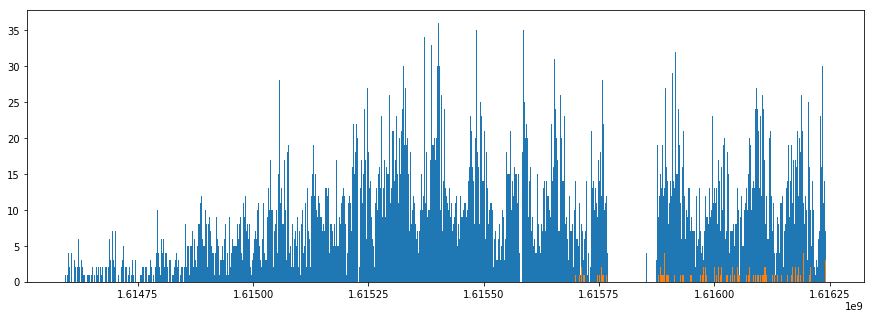

In [204]:
plt.figure(figsize=(15, 5))
plt.hist(swap_stamps, bins=1000);
plt.hist(curate_stamps, bins=1000);

In [15]:
stamps = []

for tr in lib.iter_tr.iter_tr(transactions_dir, stamp_step):
    stamps.append(tr['stamp'])

import time

time.time() - stamps[-1]

99.06009531021118

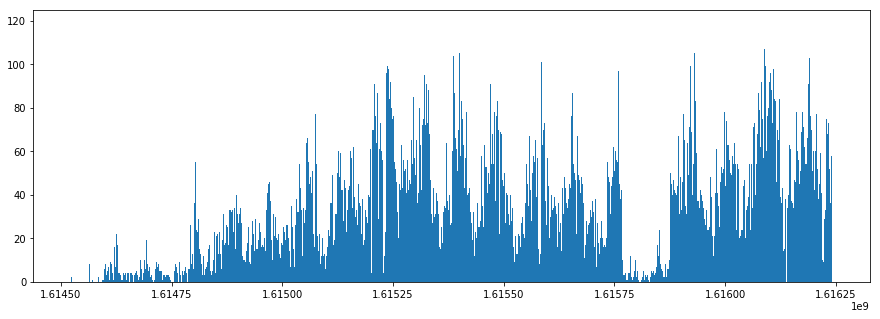

In [16]:
plt.figure(figsize=(15, 5))
plt.hist(stamps, bins=1000);